### Очистка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()
#display(sber_data.info())
display(sber_data.tail(1))

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.37895,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


Задание 2.2 Сколько районов Москвы и Московской области представлено в данных?

In [3]:
sber_data['sub_area'].nunique()

146

Задание 2.3 
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

In [4]:
sber_data['price_doc'].max()

111111112

Задание 2.4 
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

Text(0, 0.5, 'Уровень экологической обстановки')

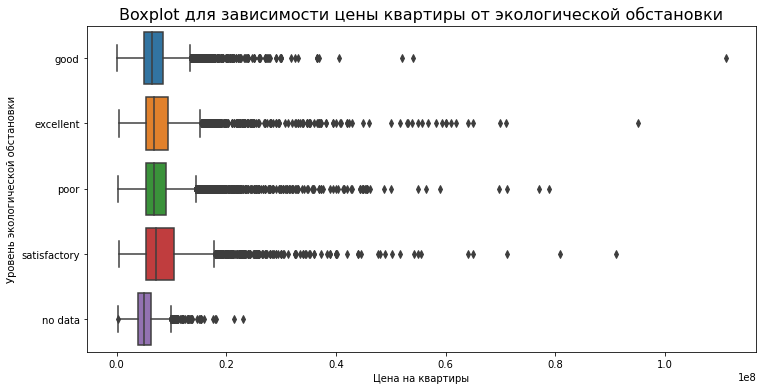

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=sber_data, x='price_doc', y='ecology')
boxplot.set_title('Boxplot для зависимости цены квартиры от экологической обстановки', fontsize=16)
boxplot.set_xlabel('Цена на квартиры')
boxplot.set_ylabel('Уровень экологической обстановки')

Задание 2.5<br>Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). 

Text(0, 0.5, 'Цена квартир')

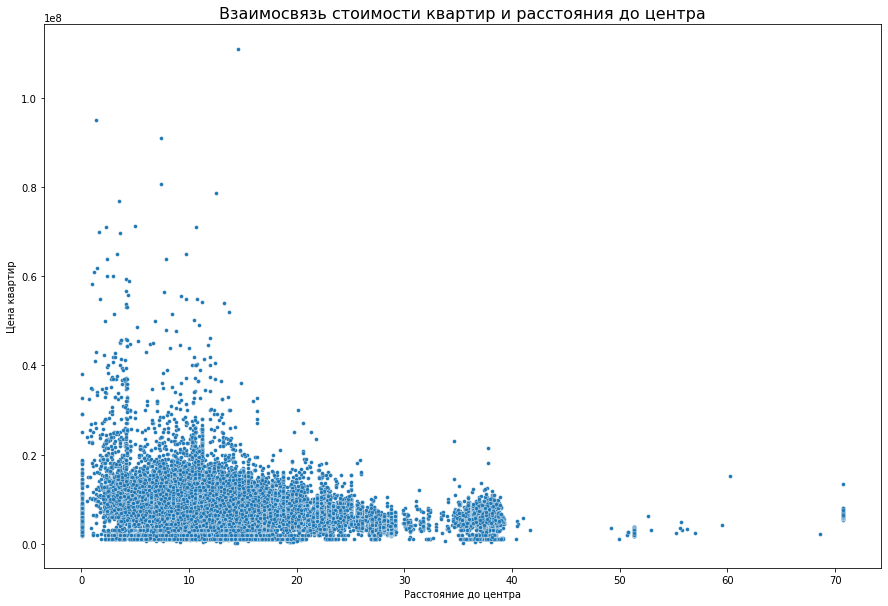

In [6]:
fig = plt.figure(figsize=(15, 10))

scatterplot = sns.scatterplot(
    data=sber_data,
    y='price_doc',
    x='kremlin_km',
    #hue='species',
    s=15,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь стоимости квартир и расстояния до центра', fontsize=16)
scatterplot.set_xlabel('Расстояние до центра')
scatterplot.set_ylabel('Цена квартир')

Выявление процента пропусков по столбцам

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

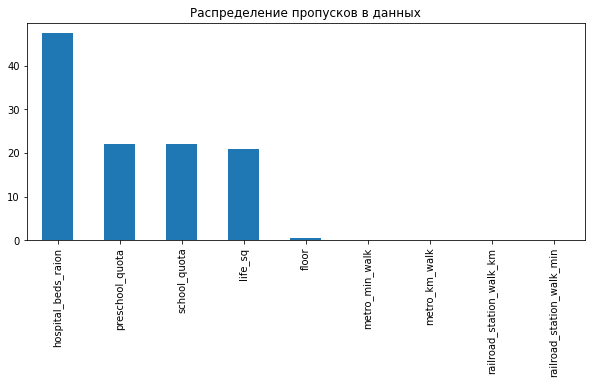

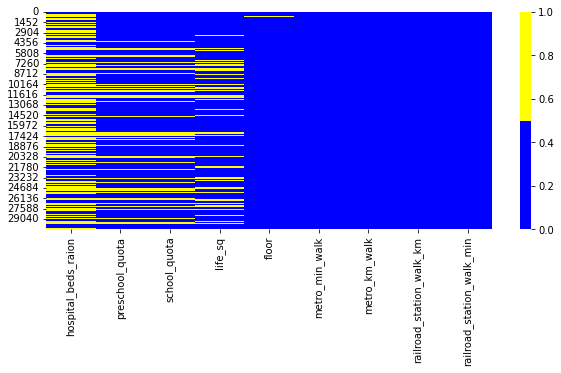

In [7]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)


#визуализируем
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

#через тепловую карту
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

Отбрасывание записей и признаков

In [8]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()

# задаем минимальный порог: вычисляем 70% от числа строк, т.е. если в столбе более 21329 (из 30471 значений) пропусков то удаляем
# (удаление применим потом к строкам и столбам)
thresh = drop_data.shape[0]*0.7
display(thresh)
display(drop_data.shape)

#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)

#удаляем записи (строка), в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)

#отображаем результирующую долю пропусков
drop_data.isnull().mean()

print(drop_data.shape) # таблица сократилась примерно на 9500 (30%) строк и на один признак (столбец)


21329.699999999997

(30471, 61)

(20888, 60)


Визуализация пропусков

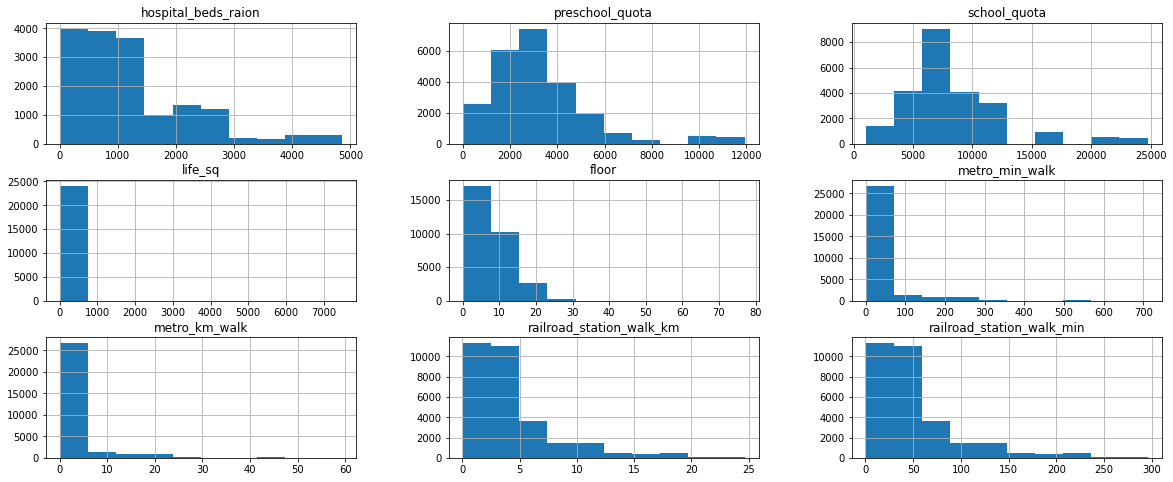

In [9]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Заполнение с помощью словаря values
<br>Проверяем процент пропусков - должен быть ноль

In [10]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()


id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

Визуализируем изменения распределения для сравнения было-стало после заполнения словарем

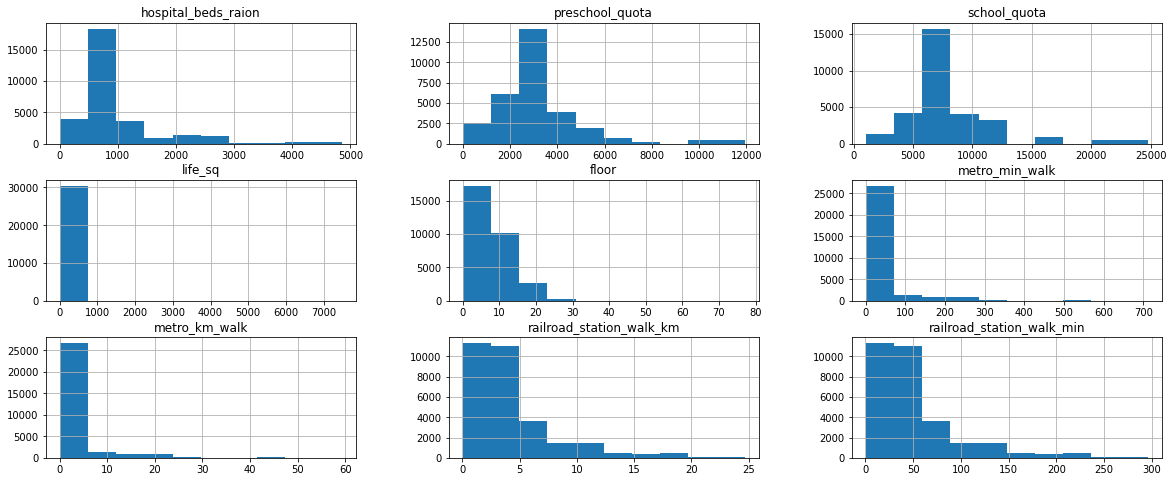

In [11]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

Добавление индикатора

In [12]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

КОМБИНИРОВАНИЕ МЕТОДОВ
<br>- удалить столбцы, в которых более 30 % пропусков;
<br>- удалить записи, в которых более двух пропусков одновременно;
<br>- заполнить оставшиеся ячейки константами.

In [13]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.shape)
display(combine_data.isnull().mean())


(26800, 60)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

### Выявление выбросов

Расчет статистических показателей

In [14]:
sber_data['life_sq'].describe()
#Выбиваются минимум и максимум. Минимум объясняется, что это студии, макс скорее опечатка, смотрим в интернете какие есть квартиры

print(sber_data[sber_data['life_sq'] == 0].shape[0])
# смотрим сколько может быть студий

display(sber_data[sber_data['life_sq'] > 7000])
# смотрим квартиры с большой площадью и видим что жилая больше общей - это ошибка!

outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])
#смотрим сколько квартир с площадью жилой больше чем суммарная
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')
# удаляем такие случаи с площадью

display(sber_data['floor'].describe())
# смотрим дискрайб по этажности домов, снова нестыковки

display(sber_data[sber_data['floor']> 50])
# смотрим сколько квартир в домах выше 50 этажей - всего одна, значит ошибка, т.к в этом районе нет таких домов в 77 этажей


45


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


37
Результирующее число записей: 30434


count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

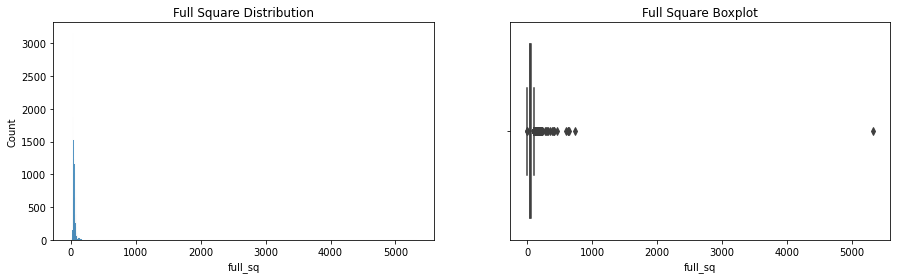

In [15]:
#Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');
#графики уехавшие т.к. справа есть невидимые на экране пеньки, на кробке этот выброс виден - крайняя правая точка в районе 5000

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


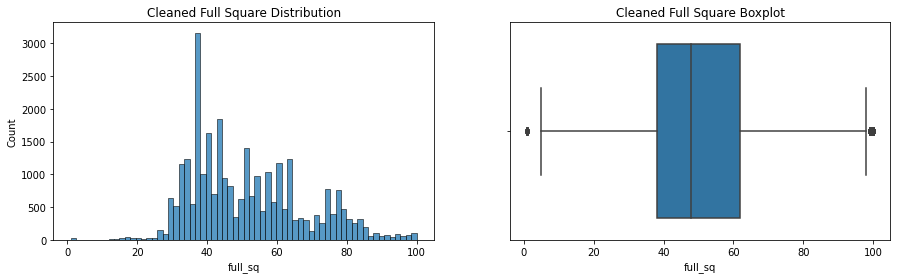

In [16]:
#Квантили вычисляются с помощью метода quantile().
#Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.
#Функция по отображению квартилей
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#Применим функцию и выявим число выбросов
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

#Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице.
# Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');
# выбросы еще сохранились, надо отбрасывать еще возможно другими методами

ЗАДАНИЕ 6.1 
<br>Давайте немного модифицируем функцию outliers_iqr(). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


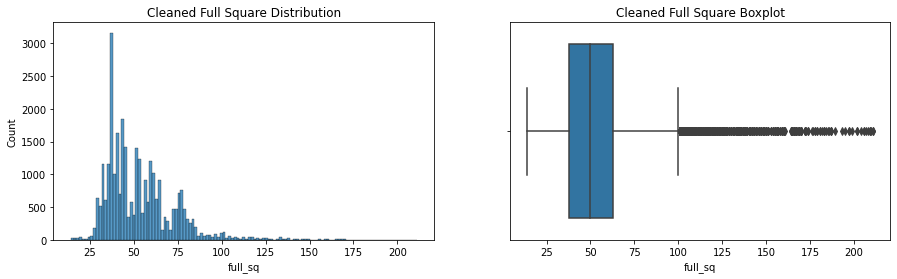

In [17]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# После модификации выбросов становится меньше
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

'\nЛевое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков»,\nдалеко отстоящих от основной массы наблюдений.\nВзяв натуральный логарифм от левого распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное.\nСлева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа.\nПо-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».\n'

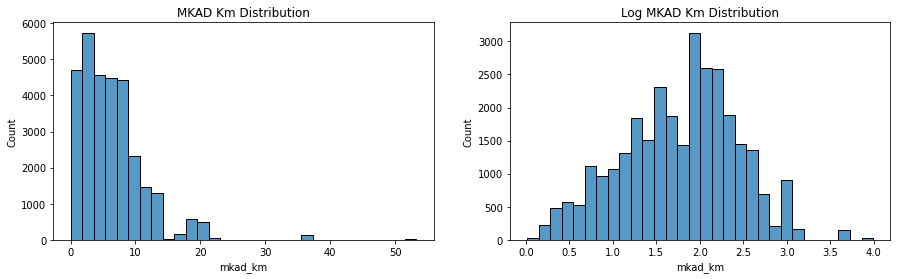

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

'''
Левое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков»,
далеко отстоящих от основной массы наблюдений.
Взяв натуральный логарифм от левого распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное.
Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа.
По-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».
'''

In [19]:
#Примечание: Численный показатель асимметрии можно вычислить с помощью метода:
#skew():
print(log_mkad_km.skew())
# -0.14263612203024953
#Асимметрия распределения называется правосторонней, если она положительная:
#Асимметрия распределения называется левосторонней, если она отрицательная:

-0.14263612203024953


Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 
На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

In [20]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

#Итак, метод z-отклонения нашел нам 33 потенциальных выброса по признаку расстояния до МКАД.
# Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:
print(outliers['sub_area'].unique())



Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438
['Poselenie Rogovskoe' 'Poselenie Kievskij']


Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

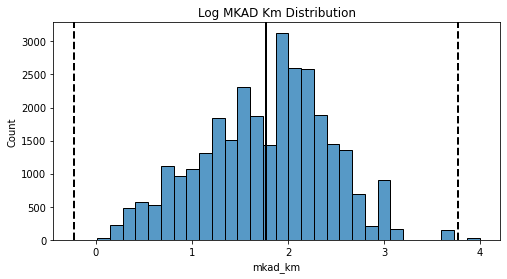

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

ЗАДАНИЕ 6.3<br>
Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod().

In [22]:
import pandas as pd
import numpy as np

sb_data = sber_data.copy()

def outliers_z_score_mod(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - sigma * left
    upper_bound = mu + sigma * right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    
#outliers, cleaned = outliers_z_score_mod(sb_data, 'mkad_km', log_scale=True, left = 3, right=3.5)
outliers, cleaned = outliers_z_score_mod(sb_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
#print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

print(outliers.shape[0])
#print(cleaned.shape[0])



52


Задание 6.5<br>Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм.

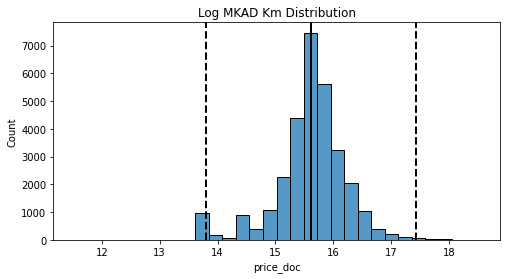

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Задание 6.7<br>
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

При логарифмировании признака price_doc добавлять к нему 1 не нужно, он не имеет нулевых значений!

In [24]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 92


ДУБЛИКАТЫ<br>
Онаружение и удаление дубликатов

In [25]:
#Проверим, есть у нас такие записи с дублями ID: для этого сравним число уникальных значений в столбце id с числом строк.
# Число уникальных значений вычислим с помощью метода nunique():

sber_data['id'].nunique() == sber_data.shape[0] # дублей ID нет

True

ПОИСК ДУБЛИКАТОВ
<br>Найдём число полных дубликатов таблице sber_data.
<br>Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 
<br>Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную sber_duplicates.
<br>Выведем число строк в результирующем DataFrame:

In [26]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}') # найдено 562 полных дубликатов

Число найденных дубликатов: 562


УДАЛЕНИЕ ДУБЛИКАТОВ
<br>Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом drop_duplicates(), который удаляет повторяющиеся записи из таблицы.
<br>Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [27]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


Обнаружение и удаление неинформативных признаков

In [28]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
        
#Итак, мы нашли шесть неинформативных признаков.
#Теперь можно удалить их с помощью метода drop(), передав результирующий список в его аргументы.

information_sber_data = sber_data.drop(low_information_cols, axis=1)
print()
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений

Результирующее число признаков: 55
